# Libraries


In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import math
from sklearn.model_selection import KFold 



# Dataset

In [2]:
data = pd.read_csv(r'Data/house_data_complete.csv')
#print(data)

# Filtering the data

In [3]:
data.dropna() #filtering the rows when NA is found, the whole row is deleted 
#print (data) # at this step , NA is not found in our dataset


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Removing unwanted Features

In [4]:
data = data.drop(["id","date","sqft_above","zipcode","lat","long","sqft_living15","sqft_lot15"], axis=1)
#data = data.setindex("bedrooms")
#data = data.drop(data.bedrooms>15,axis=0)
data = data.drop(data[data.bedrooms>15].index)
data = data.drop(data[data.bathrooms>7].index)
data = data.drop(data[data.sqft_basement>4000].index)
data = data.drop(data[data.sqft_lot>1250000].index)

data.shape #for checking 

(21606, 13)

# Visualize the data


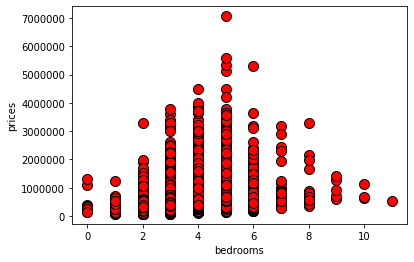

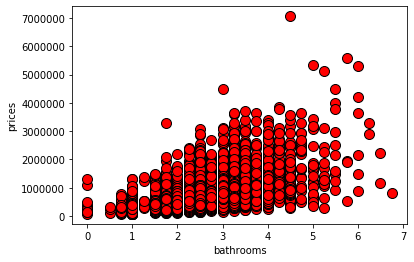

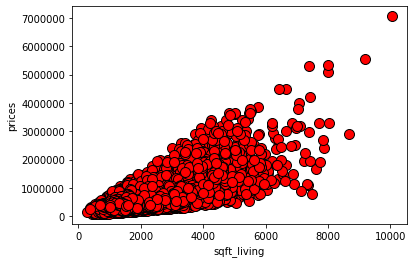

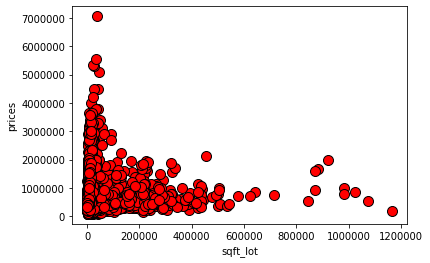

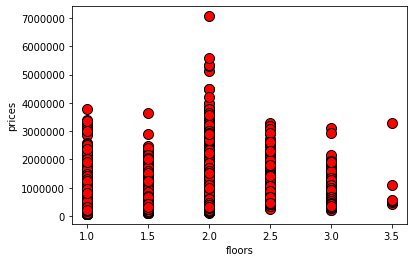

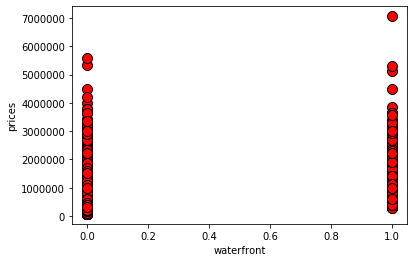

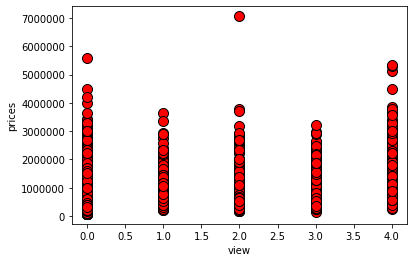

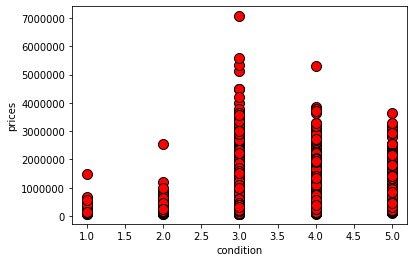

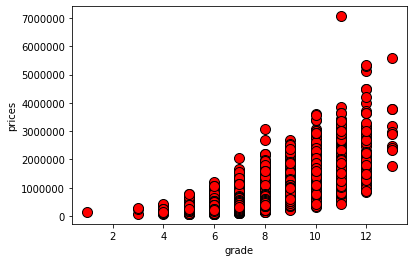

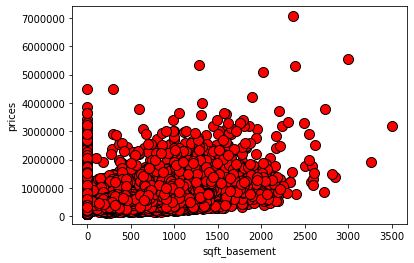

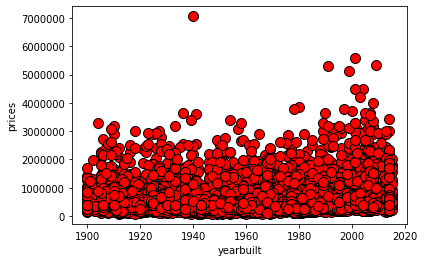

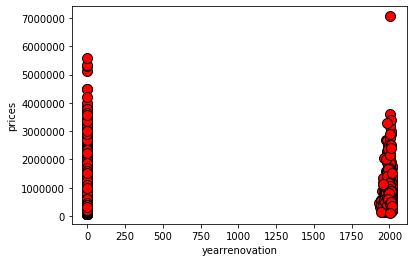

In [5]:
data_array = data.to_numpy() #converting the dataset to array 
#print(data_array)

def plotData(x, y,ylabel,xlabel):
    fig = pyplot.figure()  # open a new figure
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel(ylabel)
    pyplot.xlabel(xlabel) 
    
prices = data_array[:,0]
bedrooms = data_array[:,1]
bathrooms = data_array[:,2]
Sqft_Living = data_array[:,3]
sqft_lot = data_array[:,4]
floors = data_array[:,5]
waterfront = data_array[:,6]
view  = data_array[:,7]
condition = data_array[:,8]
grade = data_array[:,9]
sqft_basement = data_array[:,10]
yearbuilt = data_array[:,11]
yearrenovation = data_array[:,12]



plotData(bedrooms,prices,"prices","bedrooms")
plotData(bathrooms,prices,"prices","bathrooms")
plotData(Sqft_Living,prices,"prices","sqft_living")
plotData(sqft_lot,prices,"prices","sqft_lot")
plotData(floors,prices,"prices","floors")
plotData(waterfront,prices,"prices","waterfront")
plotData(view,prices,"prices","view")
plotData(condition,prices,"prices","condition")
plotData(grade,prices,"prices","grade")
plotData(sqft_basement,prices,"prices","sqft_basement")
plotData(yearbuilt,prices,"prices","yearbuilt")
plotData(yearrenovation,prices,"prices","yearrenovation")




    

# Train,Test&Validate 

In [6]:
x = data_array[:,1:] # all rows from the first col till the end
y = data_array[:,0] # all rows for col zero


#the function only for train and test so 70% for training and 30% for testing and validation 
#then the 30% , 70% for tetsing and 30% for validation 
#eventually, 70 ,20,10
xtrain,xtest_validate,ytrain,ytest_validate = train_test_split(x,y,test_size=0.3,shuffle = True) #70% train & 30% test and val
xtest,xvalidate,ytest,yvalidate = train_test_split(xtest_validate,ytest_validate,test_size=0.333333333333,shuffle = True)

#print to check
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)
print(xvalidate.shape,yvalidate.shape)


(15124, 12) (15124,)
(4321, 12) (4321,)
(2161, 12) (2161,)


# Normalization

In [7]:
def featureNormalize(x):

    xnorm = x.copy()
    mu = np.zeros(x.shape[0])
    sigma = np.zeros(x.shape[0])
    mu = np.mean(x,axis=0)
    sigma = np.std(x,axis=0)
    xnorm = (x-mu)/sigma
    return xnorm,mu,sigma

# Normalizing train,test,validation
xtrain_norm,mu,sigma = featureNormalize(xtrain)
xtest_norm = (xtest - mu)/sigma
xvalidate_norm = (xvalidate - mu)/sigma


#print to check
print(xtrain_norm.shape,ytrain.shape)
print(xtest_norm.shape,ytest.shape)
print(xvalidate_norm.shape,yvalidate.shape)


(15124, 12) (15124,)
(4321, 12) (4321,)
(2161, 12) (2161,)


# Intercept Term

In [8]:
xtrain_norm = np.concatenate([np.ones((ytrain.size,1)),xtrain_norm],axis=1)
xtest_norm = np.concatenate([np.ones((ytest.size,1)),xtest_norm],axis=1)
xvalidate_norm = np.concatenate([np.ones((yvalidate.size,1)),xvalidate_norm],axis=1)


print(xtrain_norm.shape,ytrain.shape)
print(xtest_norm.shape,ytest.shape)
print(xvalidate_norm.shape,yvalidate.shape)

(15124, 13) (15124,)
(4321, 13) (4321,)
(2161, 13) (2161,)


# The First Hypothesis

In [9]:
# the normal hypothesis
# h = theta0+theta1 X1 + ...... + thetan Xn

def computeCostMulti(X, y, theta):

    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    
    h = np.dot(X,theta)
    diff = h - y
    trans = diff.T
    J = 1/(2*m) * np.dot ( diff ,trans)
    
    # ==================================================================
    return J


In [10]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        
        theta = theta - (alpha/m)* (np.dot(X,theta.T)-y).dot(X)
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta computed from gradient descent: [ 5.38419371e+05 -3.27712327e+04  3.26563593e+04  1.46010247e+05
 -1.25314357e+04  1.32405695e+04  4.00583112e+04  3.66605053e+04
  1.25604756e+04  1.53708246e+05  7.34179741e+01 -1.03119327e+05
  2.73370384e+03]


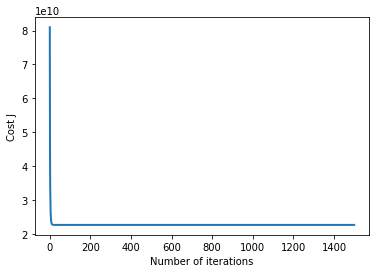

In [11]:
alpha1 = 0.5
iters = 1500

# init theta and run gradient descent
theta1 = np.zeros(13)
theta1, J_history = gradientDescentMulti(xtrain_norm, ytrain, theta1, alpha1, iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta1)))


In [12]:
#Testing the Previous functions
print(computeCostMulti(xtrain_norm,ytrain,theta1))
print(computeCostMulti(xtest_norm,ytest,theta1))
print(computeCostMulti(xvalidate_norm,yvalidate,theta1))

#correaltion for the training
ytrain_predict1 = np.dot(xtrain_norm,theta1)
correlation1_train,_ = pearsonr(ytrain,ytrain_predict1)
print('persons correlation for hypothesis one for training data: %.3f' % correlation1_train)
#print(ytrain_predict1)
#print(theta1)

#correaltion for the testing
ytest_predict1 = np.dot(xtest_norm,theta1)
correlation1_test,_ = pearsonr(ytest,ytest_predict1)
print('persons correlation for hypothesis one for testing data: %.3f' % correlation1_test)
#print(ytrain_predict1)
#print(theta1)

#correaltion for the validation
yvalidate_predict1 = np.dot(xvalidate_norm,theta1)
correlation1_validate,_ = pearsonr(yvalidate,yvalidate_predict1)
print('persons correlation for hypothesis one for validating data: %.3f' % correlation1_validate)
#print(ytrain_predict1)
#print(theta1)

22713793598.777534
23992399185.58799
18425608507.399982
persons correlation for hypothesis one for training data: 0.806
persons correlation for hypothesis one for testing data: 0.816
persons correlation for hypothesis one for validating data: 0.807


# The Second Hypothesis

In [13]:
# theta0+ theta1*x1^2+ theta2*x2^2+--
def secondhypothesis(x):
    
    xnew = np.zeros((x.shape[0],12))

    xnew[:,0] =np.square(x[:,0]) # bedrooms square
    xnew[:,1] =np.square(x[:,1]) # bathrooms square
    xnew[:,2] =np.square(x[:,2]) # living square
    xnew[:,3] =x[:,3] # lot
    #xnew[:,3] =np.square(x[:,3]) # lot
    xnew[:,4] =np.square(x[:,4]) #floors squared 
    xnew[:,5] =x[:,5] #waterfront
    #xnew[:,5] =np.square(x[:,5]) #waterfront
    xnew[:,6] =np.square(x[:,6]) #view squared
    #xnew[:,7] =np.square(x[:,7]) # condition
    #xnew[:,8] =np.square(x[:,8]) # grade
    xnew[:,7] =x[:,7] # condition
    xnew[:,8] =x[:,8] # grade
    xnew[:,9] =np.square(x[:,9]) #basement squared
    xnew[:,10] =np.square(x[:,10]) #year builtsquared
    #xnew[:,11] =np.square(x[:,11]) #year renovation
    xnew[:,11] =x[:,11] #year renovation

    return xnew



(15124, 12) (15124,)
(4321, 12) (4321,)
(2161, 12) (2161,)
(15124, 13) (15124,)
(4321, 13) (4321,)
(2161, 13) (2161,)
theta computed from gradient descent: [538419.37060301 -19523.24016462  39137.03062325 148920.56491911
 -13648.29036194  17086.78048325  35280.32553702  36762.90779116
  16022.38868754 147849.27796106  -4479.44477089 -97962.24725069
   5055.75540857]
persons correlation for hypothesis two for training data: 0.822
persons correlation for hypothesis two for testing data: 0.841
persons correlation for hypothesis two for validating data: 0.816
20951775410.506252
21024888776.642517
17653367572.303837


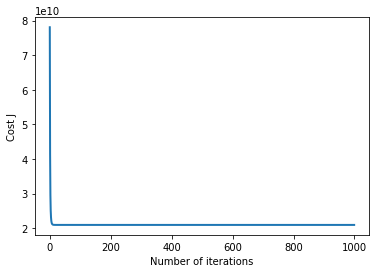

In [14]:
xtrain_norm2 = secondhypothesis(xtrain)
xtest_2 = secondhypothesis(xtest)
xvalidate_2 = secondhypothesis(xvalidate)

# Normalizing train,test,validation
xtrain_norm2,mu2,sigma2 = featureNormalize(xtrain_norm2)
#xtest_norm2 ,mu2,sigma2 = featureNormalize(xtest_norm2)
#xvalidate_norm2,mu2,sigma2 = featureNormalize(xvalidate_norm2)

xtest_norm2 = (xtest_2 - mu2)/sigma2
xvalidate_norm2 = (xvalidate_2 - mu2)/sigma2


#print to check
#print(xtrain_norm2)
#print(xtrain)
print(xtrain_norm2.shape,ytrain.shape)
print(xtest_norm2.shape,ytest.shape)
print(xvalidate_norm2.shape,yvalidate.shape)

#---------------------------------------------------------------------------------------------------------------

# Intercept Term 
xtrain_norm2 = np.concatenate([np.ones((ytrain.size,1)),xtrain_norm2],axis=1)
xtest_norm2 = np.concatenate([np.ones((ytest.size,1)),xtest_norm2],axis=1)
xvalidate_norm2 = np.concatenate([np.ones((yvalidate.size,1)),xvalidate_norm2],axis=1)

print(xtrain_norm2.shape,ytrain.shape)
print(xtest_norm2.shape,ytest.shape)
print(xvalidate_norm2.shape,yvalidate.shape)

#---------------------------------------------------------------------------------------------------------------

alpha2 = 0.5
iters = 1000

# init theta and run gradient descent
theta2 = np.zeros(13)
theta2, J_history = gradientDescentMulti(xtrain_norm2, ytrain, theta2, alpha2, iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta2)))

#---------------------------------------------------------------------------------------------------------------

#correaltion for the training
ytrain_predict2 = np.dot(xtrain_norm2,theta2)
correlation2_train,_ = pearsonr(ytrain,ytrain_predict2)
print('persons correlation for hypothesis two for training data: %.3f' % correlation2_train)
#print(ytrain_predict1)
#print(theta1)

#correaltion for the testing
ytest_predict2 = np.dot(xtest_norm2,theta2)
correlation2_test,_ = pearsonr(ytest,ytest_predict2)
print('persons correlation for hypothesis two for testing data: %.3f' % correlation2_test)
#print(ytrain_predict1)
#print(theta1)

#correaltion for the validation
yvalidate_predict2 = np.dot(xvalidate_norm2,theta2)
correlation2_validate,_ = pearsonr(yvalidate,yvalidate_predict2)
print('persons correlation for hypothesis two for validating data: %.3f' % correlation2_validate)
#print(ytrain_predict1)
#print(theta1)

print(computeCostMulti(xtrain_norm2,ytrain,theta2))
print(computeCostMulti(xtest_norm2,ytest,theta2))
print(computeCostMulti(xvalidate_norm2,yvalidate,theta2))


# The Third Hypothesis

In [15]:
#print(np.exp(xtest_norm2))

""""def thirdhypothesis(x):
    
    xnew = np.zeros((x.shape[0],12))

    xnew[:,0] =np.square(x[:,0]) # bedrooms square
    xnew[:,1] =np.square(x[:,1]) # bathrooms square
    xnew[:,2] =np.square(x[:,2]) # living square
    xnew[:,3] =np.exp(x[:,3]) # exponential lot
    xnew[:,4] =np.square(x[:,4]) #floors squared 
    xnew[:,5] =x[:,5] #waterfront
    xnew[:,6] =np.square(x[:,6]) #view squared
    xnew[:,7] =x[:,7] # condition
    xnew[:,8] =np.exp(x[:,8]) # expo grade
    xnew[:,9] =np.square(x[:,9]) #basement squared
    xnew[:,10] =np.square(x[:,10]) #year builtsquared
    xnew[:,11] =x[:,11] #year renovation

    return xnew"""
def thirdhypothesis(x):
    xnew = np.zeros((x.shape[0],5))
    
    xnew[:,0] = np.square(x[:,0]*x[:,1]*x[:,4]*x[:,9]) # bedroom,bathroom,basement,floors
    xnew[:,1] = x[:,5]*x[:,6] #waterfront,view
    xnew[:,2] = x[:,7]*x[:,8] #condition,grade
    xnew[:,3] = np.square(x[:,10]*x[:,11]) #year built,year renov
    xnew[:,4] = x[:,2] *x[:,3]#lot, living 
    
    return xnew

(15124, 5) (15124,)
(4321, 5) (4321,)
(2161, 5) (2161,)
(15124, 6) (15124,)
(4321, 6) (4321,)
(2161, 6) (2161,)
theta computed from gradient descent: [538419.37060301  74028.37410385  68790.2924567  161196.70115635
  41923.29603474  31943.06732824]
persons correlation for hypothesis three for training data: 0.599
persons correlation for hypothesis three for testing data: 0.668
persons correlation for hypothesis three for validating data: 0.589
41492038589.6178
39937806802.33907
34098138689.14539


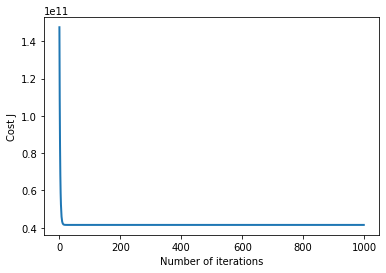

In [16]:
xtrain_norm3 = thirdhypothesis(xtrain)
xtest_3 = thirdhypothesis(xtest)
xvalidate_3 = thirdhypothesis(xvalidate)

# Normalizing train,test,validation
xtrain_norm3,mu3,sigma3 = featureNormalize(xtrain_norm3)
#xtest_norm3 ,mu3,sigma3 = featureNormalize(xtest_norm3)
#xvalidate_norm3,mu3,sigma3 = featureNormalize(xvalidate_norm3)

xtest_norm3 = (xtest_3 - mu3)/sigma3
xvalidate_norm3 = (xvalidate_3 - mu3)/sigma3


#print to check
#print(xtrain_norm2)
#print(xtrain)
print(xtrain_norm3.shape,ytrain.shape)
print(xtest_norm3.shape,ytest.shape)
print(xvalidate_norm3.shape,yvalidate.shape)

#---------------------------------------------------------------------------------------------------------------

# Intercept Term 
xtrain_norm3 = np.concatenate([np.ones((ytrain.size,1)),xtrain_norm3],axis=1)
xtest_norm3 = np.concatenate([np.ones((ytest.size,1)),xtest_norm3],axis=1)
xvalidate_norm3 = np.concatenate([np.ones((yvalidate.size,1)),xvalidate_norm3],axis=1)

print(xtrain_norm3.shape,ytrain.shape)
print(xtest_norm3.shape,ytest.shape)
print(xvalidate_norm3.shape,yvalidate.shape)
#print(xtrain_norm3)

#---------------------------------------------------------------------------------------------------------------
alpha3 = 0.2
iters = 1000

# init theta and run gradient descent
theta3 = np.zeros(6)
theta3, J_history = gradientDescentMulti(xtrain_norm3, ytrain, theta3, alpha3, iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta3)))

#---------------------------------------------------------------------------------------------------------------

#correaltion for the training
ytrain_predict3 = np.dot(xtrain_norm3,theta3)
correlation3_train,_ = pearsonr(ytrain,ytrain_predict3)
print('persons correlation for hypothesis three for training data: %.3f' % correlation3_train)
#print(ytrain_predict1)
#print(theta1)

#correaltion for the testing
ytest_predict3 = np.dot(xtest_norm3,theta3)
correlation3_test,_ = pearsonr(ytest,ytest_predict3)
print('persons correlation for hypothesis three for testing data: %.3f' % correlation3_test)
#print(ytrain_predict1)
#print(theta1)

#correaltion for the validation
yvalidate_predict3 = np.dot(xvalidate_norm3,theta3)
correlation3_validate,_ = pearsonr(yvalidate,yvalidate_predict3)
print('persons correlation for hypothesis three for validating data: %.3f' % correlation3_validate)
#print(ytrain_predict1)
#print(theta1)


print(computeCostMulti(xtrain_norm3,ytrain,theta3))
print(computeCostMulti(xtest_norm3,ytest,theta3))
print(computeCostMulti(xvalidate_norm3,yvalidate,theta3))


# K-Folding

theta computed from gradient descent: [538419.37060301 -19523.24016462  39137.03062325 148920.56491911
 -13648.29036194  17086.78048325  35280.32553702  36762.90779116
  16022.38868754 147849.27796106  -4479.44477089 -97962.24725069
   5055.75540857]
persons correlation for hypothesis two (KF) for training data: 0.822
persons correlation for hypothesis two (KF) for testing data: 0.838
theta computed from gradient descent: [538419.37060301 -19523.24016462  39137.03062325 148920.56491911
 -13648.29036194  17086.78048325  35280.32553702  36762.90779116
  16022.38868754 147849.27796106  -4479.44477089 -97962.24725069
   5055.75540857]
persons correlation for hypothesis two (KF) for training data: 0.826
persons correlation for hypothesis two (KF) for testing data: 0.825
theta computed from gradient descent: [538419.37060301 -19523.24016462  39137.03062325 148920.56491911
 -13648.29036194  17086.78048325  35280.32553702  36762.90779116
  16022.38868754 147849.27796106  -4479.44477089 -97962.

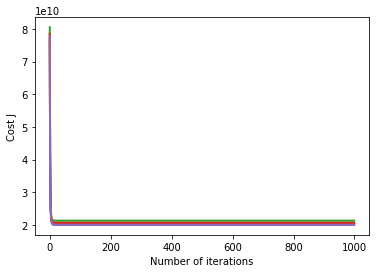

In [17]:
#k-folding for the second hypothesis

kfolding = KFold(5)
c = 1
x_kf = secondhypothesis(x)
#print(x_kf.shape)
#print(x.shape)
#print(y.shape)

for trainindex, testindex in kfolding.split(x_kf): 
        xtrain_kf = x_kf[trainindex]
        xtest_kf = x_kf[testindex]
        ytrain_kf = y[trainindex]
        ytest_kf = y[testindex]
        
        
        xtrain_kf , mukf , sigmakf = featureNormalize(xtrain_kf)
        xtest_kf = (xtest_kf - mukf )/sigmakf
        
        #print(xtrain_kf.shape,ytrain_kf.shape)
        
        xtrain_kf = np.concatenate([np.ones((ytrain_kf.size,1)),xtrain_kf],axis=1)
        xtest_kf = np.concatenate([np.ones((ytest_kf.size,1)),xtest_kf],axis=1)
        
        
        #print(xtrain_kf.shape,ytrain_kf.shape)
        
        alpha_kf = 0.5
        iters = 1000

        # init theta and run gradient descent
        theta_kf = np.zeros(13)
        theta_kf, J_history = gradientDescentMulti(xtrain_kf, ytrain_kf, theta_kf, alpha_kf, iters)

        # Plot the convergence graph
        pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
        pyplot.xlabel('Number of iterations')
        pyplot.ylabel('Cost J')

        # Display the gradient descent's result
        print('theta computed from gradient descent: {:s}'.format(str(theta2)))
        
        #correaltion for the training
        ytrain_predict_kf = np.dot(xtrain_kf,theta_kf)
        correlation_kf_train,_ = pearsonr(ytrain_kf,ytrain_predict_kf)
        print('persons correlation for hypothesis two (KF) for training data: %.3f' % correlation_kf_train)
        #print(ytrain_predict1)
        #print(theta1)

        #correaltion for the testing
        ytest_predict_kf = np.dot(xtest_kf,theta_kf)
        correlation_kf_test,_ = pearsonr(ytest_kf,ytest_predict_kf)
        print('persons correlation for hypothesis two (KF) for testing data: %.3f' % correlation_kf_test)
        #print(ytrain_predict1)
        #print(theta1)

        
        
        
        
        